<a href="https://colab.research.google.com/github/PabloCaSan/Machine_Learning_Notes/blob/main/RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de regresión lineal simple

*Se aplicará un modelo de regresión lineal simple usando SciKitLearn, Pandas y Matplotlib, a un archivo de datos sobre salarios y años de experiencia*

Conectamos a Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/Platzi/Machine\ Learning
!ls

/content/drive/MyDrive/Platzi/Machine Learning
'1 - Numpy.ipynb'   '3 - RegresionLinealSimple.ipynb'   salarios.csv
'2 - Pandas.ipynb'   canciones-2018.csv


Una alternativa para subir directamente el archivo mediante Colab es

```
import io
from google.colab import files
uploaded = files.upload()
```

Se selecciona el archivo y después se corre la siguiente línea

```
dataset = pd.read_csv(io.BytesIO(uploaded['salarios.csv']))
```

O bien, simplemente navegar por Colab y usar

```
dataset = pd.read_csv(/content/drive/MyDrive/Platzi/Machine\ Learning/'salarios.csv')
```



Cargamos las librerías

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Y cargamos el archivo

In [18]:
df = pd.read_csv('salarios.csv')
df.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


Es conveniente empezar por analizar cómo está compuesto el dataframe

In [19]:
df.shape

(30, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aexperiencia  30 non-null     float64
 1   Salario       30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Ahora le decimos a Python qué columnas nos interesan para que posteriormente podamos correr el modelo

In [22]:
x  = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Lo anterior también se puede hacer con

```
x = df["Aexperiencia"].values.reshape(30,1)
y = df["Salarios"].values.reshape(30,1)
```



Para poder entrenar la variable hacemos

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Donde test_size sirve para elegir el porcentaje de datos que se tomarán en cuenta para el modelo, en este caso el 80%. Por otro lado, random_state sirve para inicializar el generador de números aleatorios, en este caso desde cero

Veamos los datos que se usarán para entrenar el modelo

In [28]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

Ahora apliquemos la regresión lineal

In [27]:
regresion = LinearRegression()
regresion.fit(X_train, Y_train)

LinearRegression()

Grafiquemos los datos de aprendizaje junto con la recta de la regresión lineal

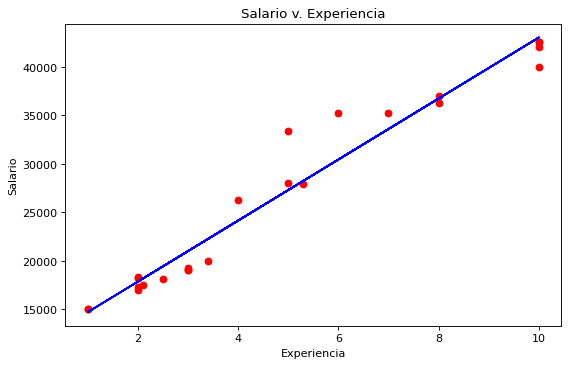

In [57]:
fig = plt.figure(figsize=(8,5), dpi=80)
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regresion.predict(X_train), color = 'blue')
plt.title('Salario v. Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

Y grafiquemos los datos de prueba (los que no participaron en el entrenamiento) junto con la recta de la regresión lineal

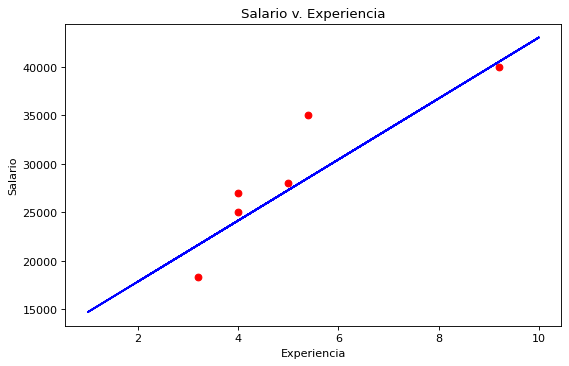

In [54]:
fig = plt.figure(figsize=(8,5), dpi=80)
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regresion.predict(X_train), color = 'blue')
plt.title('Salario v. Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

Se ve que no están muy alejados de la recta, veamos cuantitativamente qué tan cercanos están a ella

In [44]:
regresion.score(X_test, Y_test)

0.7862437374732997

No está tan mal, pero podría mejorar agregando más datos.

Nota: el resultado anterior es el coeficiente de correlación (R^2)